# Titanic Data Analysis (Logistic Regression)

## Data Collection

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [10]:
data = pd.read_csv('F:\\Technology\Data Science\Machine Learning Projects\Titanic Data Analysis\\titanic.csv')

In [27]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Data Analysis

#### No of people survived / not survived

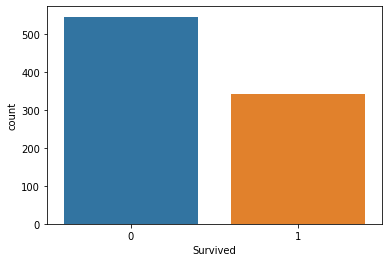

In [12]:
sns.countplot(x='Survived',data=data)

#### No of people in different classes

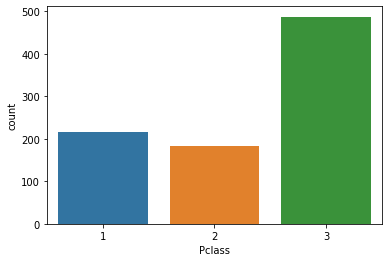

In [13]:
sns.countplot(x='Pclass',data=data)

#### No of people survived / not survived in different classes

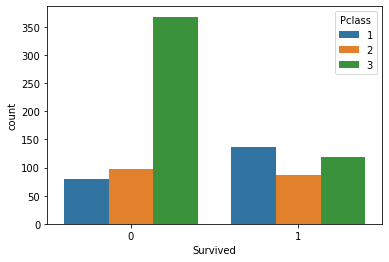

In [14]:
sns.countplot(x='Survived',hue='Pclass',data=data)

#### No of people survived / not survived according to sex

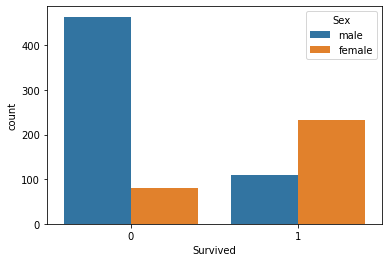

In [15]:
sns.countplot(x='Survived',hue='Sex',data=data)

#### Age distribution of people on titanic

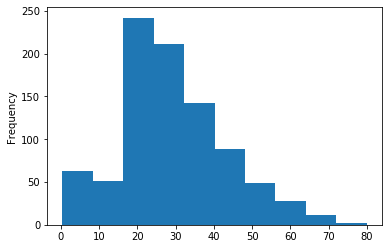

In [16]:
data['Age'].plot.hist()

#### Fare distribution of people on titanic

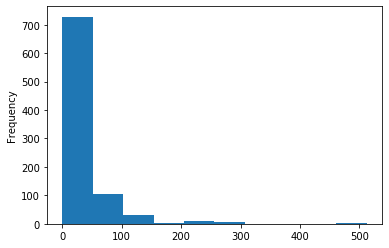

In [17]:
data['Fare'].plot.hist()

#### No of siblings / spouses aboarded on titanic

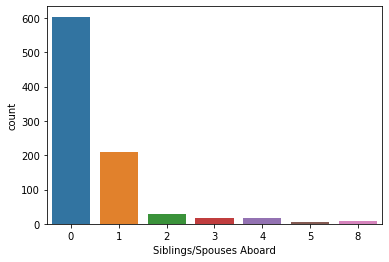

In [18]:
sns.countplot(x='Siblings/Spouses Aboard',data=data)

## Data Wrangling

In [19]:
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

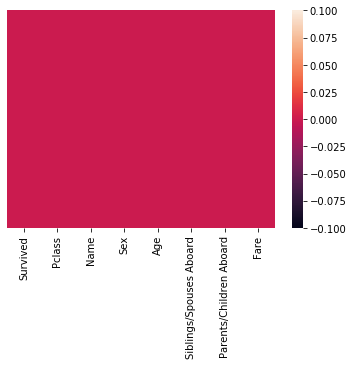

In [20]:
sns.heatmap(data.isnull(),yticklabels=False)

##### There are no null values

In [23]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)

In [29]:
Pcl = pd.get_dummies(data['Pclass'],drop_first=True)
Pcl

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
882,1,0
883,0,0
884,0,1
885,0,0


In [32]:
data = pd.concat([data,Sex,Pcl],axis=1)

In [33]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [34]:
data.drop(['Name','Sex'],axis=1,inplace=True)

In [35]:
data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1


## Train and Test

In [38]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
LR = LogisticRegression()

In [50]:
LR.fit(X_train,y_train)

C:\Users\Zuraiz Ahmed Shehzad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
predictions = LR.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test,predictions)

array([[130,  32],
       [ 29,  76]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,predictions)

0.7715355805243446